## This notebook is where I build a model to model SI using just information from doctors' notes

In [3]:
# import necessary libraries
import pandas as pd
import numpy as np

In [4]:
# Reading in the data

df = pd.read_csv('../Data/extract_merged_with_full_OQ.csv')

In [5]:
# changing the name of the OQ_8 to SI
df.rename(columns={'OQ_8':'SI'}, inplace=True)
no_id = df.drop(['ID', 'AppointID', 'row'], axis=1)

In [6]:
# checking how many of each column are nans

print(no_id.isnull().sum())

past_thoughts_about_death                      0
past_thoughts_about_ways_to_die                0
past_attempts_to_try_to_die                    0
past_hospitalizations_because_of_SI_or_SA      0
current_thoughts_about_death                   0
                                            ... 
OQ_41                                        299
OQ_42                                        299
OQ_43                                        299
OQ_44                                        299
OQ_45                                        299
Length: 77, dtype: int64


In [7]:
# Taking a look at the dataframe
no_id

,past_thoughts_about_death,past_thoughts_about_ways_to_die,past_attempts_to_try_to_die,past_hospitalizations_because_of_SI_or_SA,current_thoughts_about_death,current_thoughts_about_ways_to_die,current_intent_to_try_to_die,client_acquiring_means_to_try_to_kill_themselves,cooccuring_mental_health_symptoms,pornography_use,...,OQ_36,OQ_37,OQ_38,OQ_39,OQ_40,OQ_41,OQ_42,OQ_43,OQ_44,OQ_45
0,0,0,0,0,0,0,0,0,0,0,...,2.0,4.0,3.0,3.0,4.0,4.0,1.0,0.0,0.0,1.0
1,0,0,0,0,0,0,0,0,1,0,...,0.0,2.0,0.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0
2,0,0,0,0,0,0,0,0,1,0,...,2.0,3.0,3.0,0.0,3.0,2.0,3.0,3.0,0.0,2.0
3,0,0,0,0,0,0,0,0,1,0,...,4.0,2.0,4.0,1.0,2.0,2.0,3.0,2.0,1.0,3.0
4,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
978,0,0,0,0,0,0,0,0,1,0,...,2.0,2.0,1.0,1.0,3.0,1.0,2.0,2.0,0.0,1.0
979,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
980,0,0,0,0,0,0,0,0,1,0,...,2.0,2.0,1.0,0.0,1.0,2.0,2.0,2.0,0.0,1.0


In [8]:
# Because so many of the 'how_recent' questions are missing, I will drop them from the dataset

# how_recent_cols = [col for col in df.columns if 'how_recent' in col]
how_recent_cols_id = [col for col in no_id.columns if 'how_recent' in col]

# df.drop(how_recent_cols, axis=1, inplace=True)
no_id.drop(how_recent_cols_id, axis=1, inplace=True)

# Interesting to note that out of 1000 rows, 300 are missing the SI column. I will drop these rows

# df.dropna(subset=['SI'], inplace=True)
no_id.dropna(subset=['SI'], inplace=True)


In [9]:
no_id

,past_thoughts_about_death,past_thoughts_about_ways_to_die,past_attempts_to_try_to_die,past_hospitalizations_because_of_SI_or_SA,current_thoughts_about_death,current_thoughts_about_ways_to_die,current_intent_to_try_to_die,client_acquiring_means_to_try_to_kill_themselves,cooccuring_mental_health_symptoms,pornography_use,...,OQ_36,OQ_37,OQ_38,OQ_39,OQ_40,OQ_41,OQ_42,OQ_43,OQ_44,OQ_45
0,0,0,0,0,0,0,0,0,0,0,...,2.0,4.0,3.0,3.0,4.0,4.0,1.0,0.0,0.0,1.0
1,0,0,0,0,0,0,0,0,1,0,...,0.0,2.0,0.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0
2,0,0,0,0,0,0,0,0,1,0,...,2.0,3.0,3.0,0.0,3.0,2.0,3.0,3.0,0.0,2.0
3,0,0,0,0,0,0,0,0,1,0,...,4.0,2.0,4.0,1.0,2.0,2.0,3.0,2.0,1.0,3.0
5,0,0,0,0,0,0,0,0,0,0,...,4.0,0.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,0,0,0,0,0,0,0,0,1,1,...,1.0,1.0,2.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0
975,0,0,0,0,0,0,0,0,1,0,...,3.0,0.0,4.0,0.0,3.0,2.0,2.0,2.0,1.0,4.0
976,0,0,0,0,0,0,0,0,0,0,...,2.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,0.0,2.0
978,0,0,0,0,0,0,0,0,1,0,...,2.0,2.0,1.0,1.0,3.0,1.0,2.0,2.0,0.0,1.0


In [10]:
# Creating a mapping for abbreviated column names

current_column_names = no_id.columns

abbrs = ['PTAD','PTAWD','PATD','PHBSI','CAD','CTAWD','CITD','CAMKT','COMH','PU','AAI','PFE','LMR','DCR','FOP','ALFS','FOBB','SCT','FRU','CCR','PP','REC','SI']

abbreviations = dict(zip(current_column_names, abbrs))

# Renaming the columns in the DataFrame using the abbreviations dictionary
no_id_renamed = no_id.rename(columns=abbreviations)

In [11]:
no_id_renamed

,PTAD,PTAWD,PATD,PHBSI,CAD,CTAWD,CITD,CAMKT,COMH,PU,...,OQ_36,OQ_37,OQ_38,OQ_39,OQ_40,OQ_41,OQ_42,OQ_43,OQ_44,OQ_45
0,0,0,0,0,0,0,0,0,0,0,...,2.0,4.0,3.0,3.0,4.0,4.0,1.0,0.0,0.0,1.0
1,0,0,0,0,0,0,0,0,1,0,...,0.0,2.0,0.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0
2,0,0,0,0,0,0,0,0,1,0,...,2.0,3.0,3.0,0.0,3.0,2.0,3.0,3.0,0.0,2.0
3,0,0,0,0,0,0,0,0,1,0,...,4.0,2.0,4.0,1.0,2.0,2.0,3.0,2.0,1.0,3.0
5,0,0,0,0,0,0,0,0,0,0,...,4.0,0.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,0,0,0,0,0,0,0,0,1,1,...,1.0,1.0,2.0,0.0,2.0,1.0,1.0,1.0,0.0,0.0
975,0,0,0,0,0,0,0,0,1,0,...,3.0,0.0,4.0,0.0,3.0,2.0,2.0,2.0,1.0,4.0
976,0,0,0,0,0,0,0,0,0,0,...,2.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,0.0,2.0
978,0,0,0,0,0,0,0,0,1,0,...,2.0,2.0,1.0,1.0,3.0,1.0,2.0,2.0,0.0,1.0


### The next thing we do is EDA

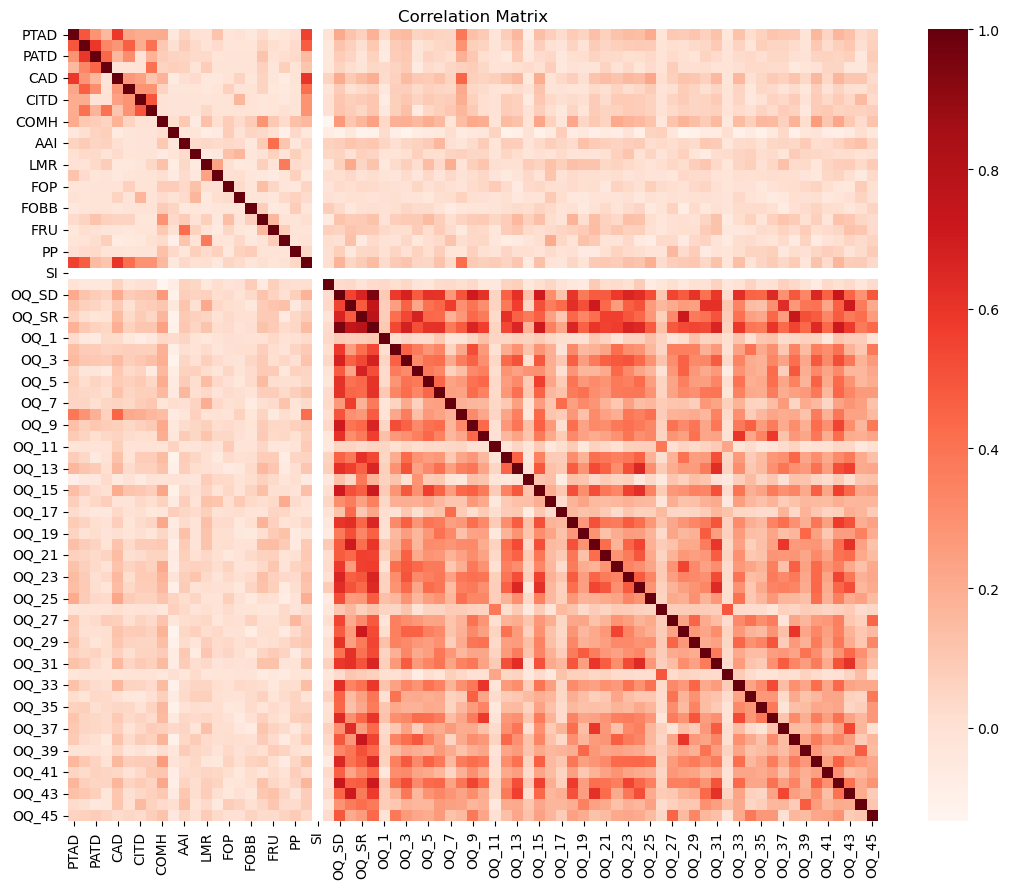

In [12]:
# Plotting correlation matrix

import seaborn as sns

import matplotlib.pyplot as plt

# Compute the correlation matrix without the ID, AppointID, and row columns

plt.figure(figsize=(11, 9))
sns.heatmap(no_id_renamed.corr(), cmap='Reds', annot=False)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [13]:
# what proportion of the appointments exhibit SI?

print(no_id['SI'].value_counts(normalize=True))

# what proportion of the appointments have an SI of 0 verses not zero?

print(no_id['SI'].apply(lambda x: 1 if x > 0 else 0).value_counts(normalize=True))


# What proportion of the appointments have a non-zero value?
pd.DataFrame((no_id > 0).mean())



SI
0.0    0.682284
1.0    0.200586
2.0    0.079063
3.0    0.030747
4.0    0.007321
Name: proportion, dtype: float64
SI
0    0.682284
1    0.317716
Name: proportion, dtype: float64


,0
past_thoughts_about_death,0.068814
past_thoughts_about_ways_to_die,0.017570
past_attempts_to_try_to_die,0.010249
past_hospitalizations_because_of_SI_or_SA,0.004392
current_thoughts_about_death,0.048316
...,...
OQ_41,0.786237
OQ_42,0.912152
OQ_43,0.893119
OQ_44,0.221083


In [14]:
# Removing all columns that start with "OQ_" but are not followed by a number (This is removing summary stats that are co-linear)

# This will remove all columns that start with "OQ_" but are not followed by a number
no_id = no_id.loc[:, ~no_id.columns.str.match(r'OQ_[^0-9]')]

# removing all question marks from the column names
no_id.columns = no_id.columns.str.replace('?', '', regex=False)

# removing OQpresent
no_id = no_id.loc[:, ~no_id.columns.str.match(r'OQpresent')]


### Now that we have done some data cleaning, we can start doing our modeling. First we'll do the train/test split

In [15]:
from sklearn.model_selection import train_test_split

# Remove all rows with NaN values from the dataset
no_id_clean = no_id.dropna()
print(f"Original dataset size: {len(no_id)}")
print(f"Clean dataset size after dropping NaN values: {len(no_id_clean)}")

# Define features (X) and target (y)
X = no_id_clean.drop(['SI'], axis=1)
y = no_id_clean['SI']

# Convert all non-zero values in y to 1 (binary classification)
y_binary = y.apply(lambda x: 1 if x > 0 else 0)

# Single train-test split (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_binary, 
    test_size=0.2, 
    random_state=42,
)

# X_train, y_train - For training and validation (e.g., cross-validation or full training)
# X_test, y_test - For final model evaluation


Original dataset size: 683
Clean dataset size after dropping NaN values: 675


#### Now we can start modeling. I try XGBoost, LightGBM, regularized logistic regression, and logistic regression without regularization

Starting with XGBoost

100%|██████████| 2/2 [02:39<00:00, 79.92s/it]



Top 5 parameter combinations by average F1 score:
   max_depth  learning_rate  n_estimators  threshold  avg_f1_score
1          3           0.10           100       0.35      0.599045
0          3           0.01           100       0.30      0.586430

Best hyperparameters and threshold:
max_depth: 3
learning_rate: 0.1
n_estimators: 100
threshold: 0.35
Best average F1 score: 0.5990


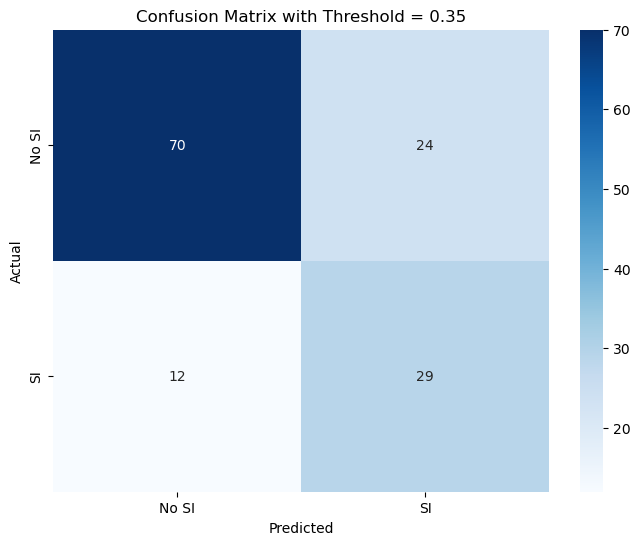


========== MODEL PERFORMANCE SUMMARY ==========
Best Hyperparameters: max_depth=3, learning_rate=0.1, n_estimators=100
Best Threshold: 0.35

Test Set Performance:
F1 Score: 0.6170
Recall: 0.7073
Precision: 0.5472
AUC-ROC: 0.8225

Confusion Matrix:
True Negatives: 70
False Positives: 24
False Negatives: 12
True Positives: 29


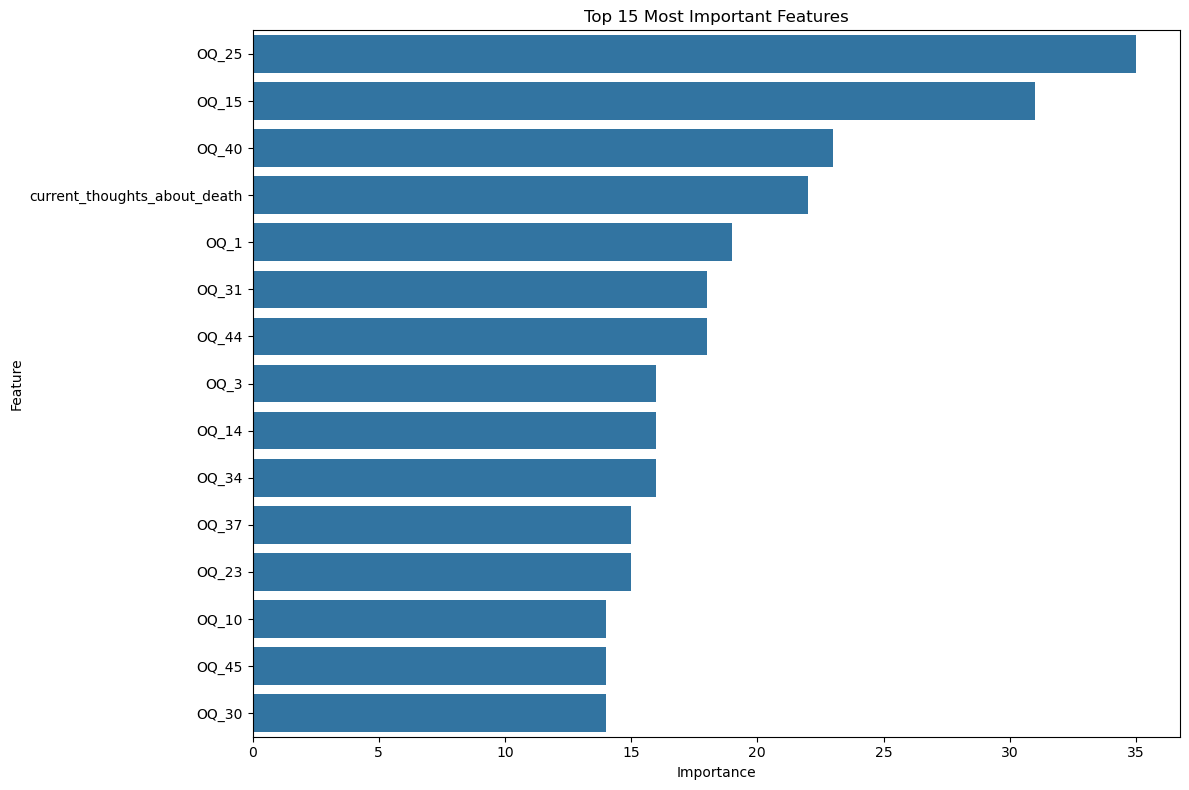


Top 10 Most Important Features:
                         Feature  Importance
45                         OQ_25        35.0
35                         OQ_15        31.0
60                         OQ_40        23.0
4   current_thoughts_about_death        22.0
22                          OQ_1        19.0
51                         OQ_31        18.0
64                         OQ_44        18.0
24                          OQ_3        16.0
34                         OQ_14        16.0
54                         OQ_34        16.0


In [ ]:
from sklearn.metrics import recall_score, precision_score, confusion_matrix, f1_score, roc_auc_score
from sklearn.model_selection import KFold
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import pandas as pd
import itertools
from tqdm import tqdm

# Suppress all warnings
warnings.filterwarnings('ignore')

# For specific XGBoost warnings
import logging
logging.getLogger("xgboost").setLevel(logging.ERROR)

# ========== Grid search over hyperparameters ==========

# Define hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200, 300]
}


# Define threshold range to test
thresholds = np.arange(0.05, 1.0, 0.05)

# Generate all parameter combinations
param_combinations = list(itertools.product(
    param_grid['max_depth'],
    param_grid['learning_rate'],
    param_grid['n_estimators']
))

# Set up k-fold cross-validation on training set only (not using validation set yet)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Track best parameters and scores
best_avg_f1 = 0
best_params = None
best_threshold = None
results = []

# Grid search over parameter combinations
for max_depth, learning_rate, n_estimators in tqdm(param_combinations):
    
    # Set parameters
    params = {
        'max_depth': max_depth,
        'learning_rate': learning_rate,
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
    }
    
    # Store F1 scores for each fold and threshold
    f1_scores = np.zeros((kfold.n_splits, len(thresholds)))
    
    # Perform k-fold cross-validation on training set
    for fold, (train_idx, val_idx) in enumerate(kfold.split(X_train, y_train)):
        # Split training set into fold-train and fold-val
        X_fold_train, X_fold_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
        
        # Convert to DMatrix
        dtrain_fold = xgb.DMatrix(X_fold_train, label=y_fold_train)
        dval_fold = xgb.DMatrix(X_fold_val, label=y_fold_val)
        
        # Train model
        model = xgb.train(params, dtrain_fold, num_boost_round=n_estimators)
        
        # Get probabilities
        val_probs = model.predict(dval_fold)
        
        # Evaluate across all thresholds
        for t_idx, threshold in enumerate(thresholds):
            y_pred = (val_probs >= threshold).astype(int)
            f1 = f1_score(y_fold_val, y_pred)
            f1_scores[fold, t_idx] = f1
    
    # Determine best threshold for this parameter set
    avg_f1_per_threshold = np.mean(f1_scores, axis=0)
    best_t_idx = np.argmax(avg_f1_per_threshold)
    best_t = thresholds[best_t_idx]
    best_t_f1 = avg_f1_per_threshold[best_t_idx]
    
    results.append({
        'max_depth': max_depth,
        'learning_rate': learning_rate,
        'n_estimators': n_estimators,
        'threshold': best_t,
        'avg_f1_score': best_t_f1
    })
    
    if best_t_f1 > best_avg_f1:
        best_avg_f1 = best_t_f1
        best_params = {
            'max_depth': max_depth,
            'learning_rate': learning_rate,
            'n_estimators': n_estimators
        }
        best_threshold = best_t


# Convert results to DataFrame for easier analysis
results_df = pd.DataFrame(results)
print("\nTop 5 parameter combinations by average F1 score:")
print(results_df.sort_values('avg_f1_score', ascending=False).head(5))

print("\nBest hyperparameters and threshold:")
print(f"max_depth: {best_params['max_depth']}")
print(f"learning_rate: {best_params['learning_rate']}")
print(f"n_estimators: {best_params['n_estimators']}")
print(f"threshold: {best_threshold:.2f}")
print(f"Best average F1 score: {best_avg_f1:.4f}")

# ========== TRAIN FINAL MODEL WITH BEST PARAMETERS ==========

# Use only the original training set (not including validation)
dtrain_final = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set best parameters for final model
final_params = {
    'max_depth': best_params['max_depth'],
    'learning_rate': best_params['learning_rate'],
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
}

# Train final model
final_model = xgb.train(
    final_params, 
    dtrain_final, 
    num_boost_round=best_params['n_estimators']
)

# ========== EVALUATE ON TEST SET ==========

# Get predictions on test set
test_probs = final_model.predict(dtest)

# Apply best threshold
test_preds = (test_probs >= best_threshold).astype(int)

# Calculate metrics
recall = recall_score(y_test, test_preds)
precision = precision_score(y_test, test_preds, zero_division=0)
f1 = f1_score(y_test, test_preds)
cm = confusion_matrix(y_test, test_preds)
auc_roc = roc_auc_score(y_test, test_probs)

# ========== VISUALIZATION ==========

# Create confusion matrix with best threshold
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No SI', 'SI'],
            yticklabels=['No SI', 'SI'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix with Threshold = {best_threshold:.2f}')
plt.show()

# ========== PERFORMANCE SUMMARY ==========
print("\n========== MODEL PERFORMANCE SUMMARY ==========")
print(f"Best Hyperparameters: max_depth={best_params['max_depth']}, "
      f"learning_rate={best_params['learning_rate']}, "
      f"n_estimators={best_params['n_estimators']}")
print(f"Best Threshold: {best_threshold:.2f}")

print("\nTest Set Performance:")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")

# Print confusion matrix components
print("\nConfusion Matrix:")
print(f"True Negatives: {cm[0, 0]}")
print(f"False Positives: {cm[0, 1]}")
print(f"False Negatives: {cm[1, 0]}")
print(f"True Positives: {cm[1, 1]}")

# ========== FEATURE IMPORTANCE ==========
# Feature importance analysis
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': [final_model.get_score(importance_type='weight').get(f, 0) for f in X.columns]
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
plt.title('Top 15 Most Important Features')
plt.tight_layout()
plt.show()

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

We can use SHAP to see how important every feature is in predicting SI

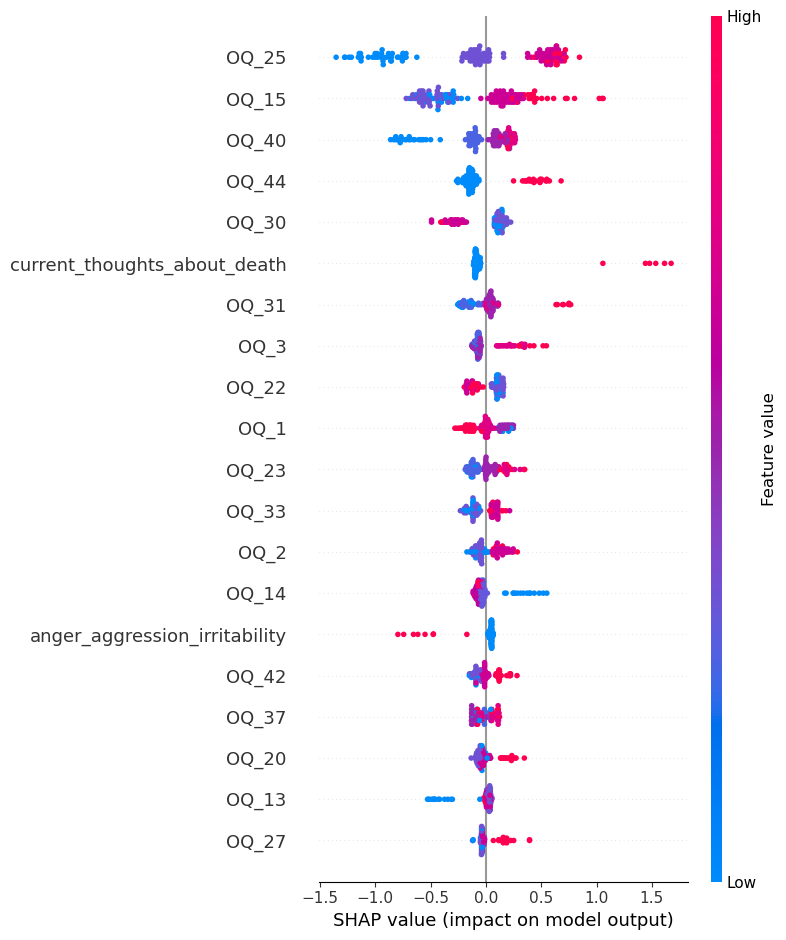

In [25]:
# getting beeswarm plot from shap using xgb_class
import shap

# Create the explainer
explainer = shap.Explainer(final_model)

# Calculate the SHAP values
shap_values = explainer(X_test)

# Create the summary plot
shap.summary_plot(shap_values, X_test)

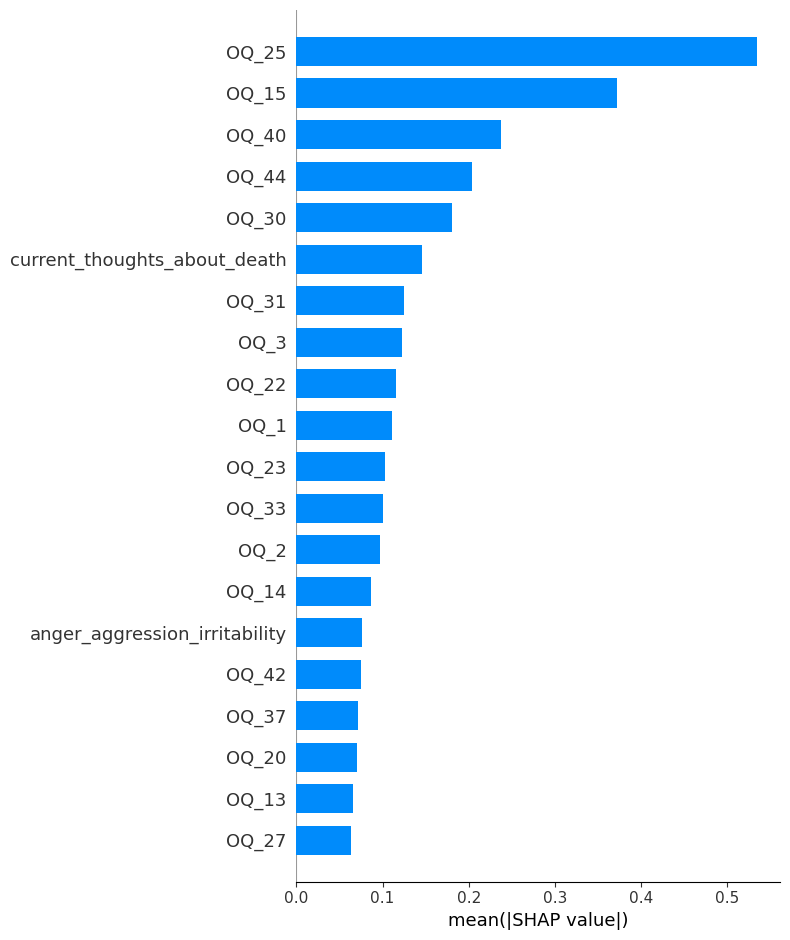

In [26]:
# Plotting average absolute shap value of each feature

import matplotlib.pyplot as plt
# identifying the most important features

shap.summary_plot(shap_values, X_test, plot_type='bar',show=False)

# Get the current figure and axis
fig = plt.gcf()
ax = plt.gca()

# Customize the x-axis label
ax.set_xlabel('mean(|SHAP value|)')

# Show the plot
plt.show()

Now we try the LightGBM Classifier

  0%|          | 0/27 [00:00<?, ?it/s]

100%|██████████| 27/27 [00:31<00:00,  1.17s/it]



Top 5 hyperparameter-threshold combinations by F1 score:
    num_leaves  learning_rate  n_estimators  f1_score  best_threshold
1           20           0.01           200  0.616307            0.26
10          31           0.01           200  0.616307            0.26
19          50           0.01           200  0.616307            0.26
11          31           0.01           300  0.612412            0.24
20          50           0.01           300  0.612412            0.24

Best hyperparameters and threshold:
num_leaves: 20
learning_rate: 0.01
n_estimators: 200
Best threshold: 0.26
Best validation F1 score: 0.6163
Test Results with threshold=0.26:
F1 Score: 0.5664
Recall: 0.7805
Precision: 0.4444


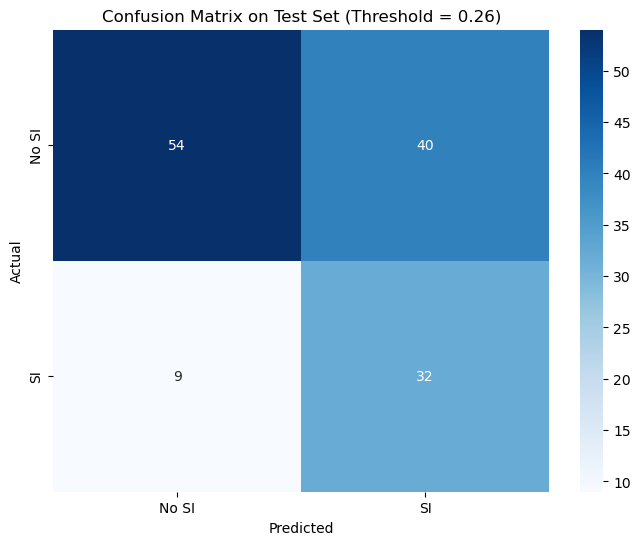


========== MODEL PERFORMANCE SUMMARY ==========
Best Hyperparameters: num_leaves=20, learning_rate=0.01, n_estimators=200
Best Threshold: 0.26

Test Set Performance:
F1 Score: 0.5664
Recall: 0.7805
Precision: 0.4444

AUC-ROC: 0.8041

Confusion Matrix on Test Set:
True Negatives: 54
False Positives: 40
False Negatives: 9
True Positives: 32

========== FEATURE IMPORTANCE ==========


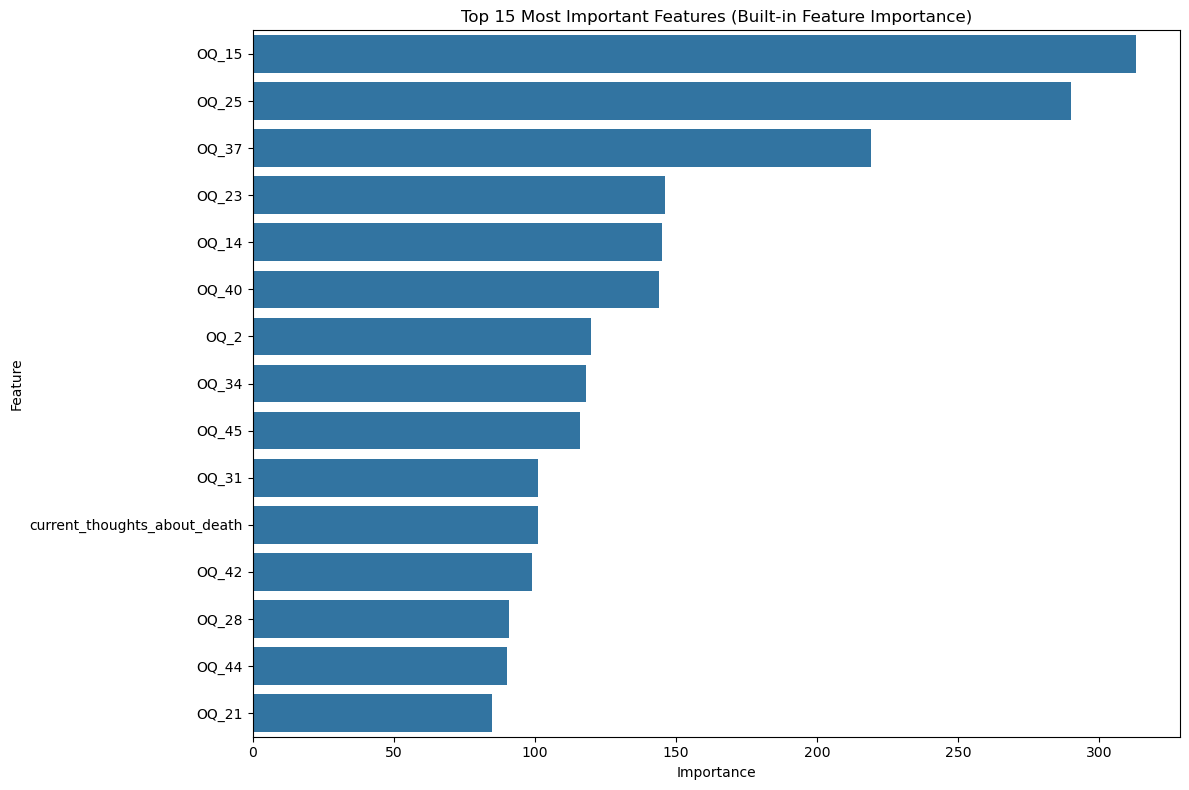


Top 10 Most Important Features:
   Feature  Importance
35   OQ_15         313
45   OQ_25         290
57   OQ_37         219
43   OQ_23         146
34   OQ_14         145
60   OQ_40         144
23    OQ_2         120
54   OQ_34         118
65   OQ_45         116
51   OQ_31         101


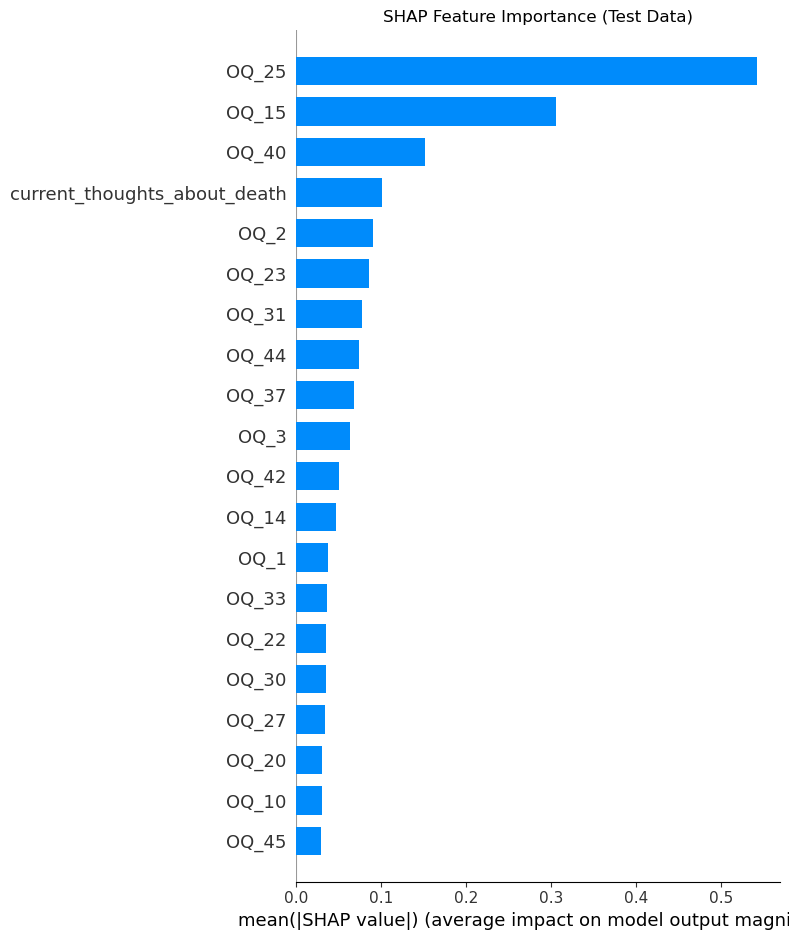

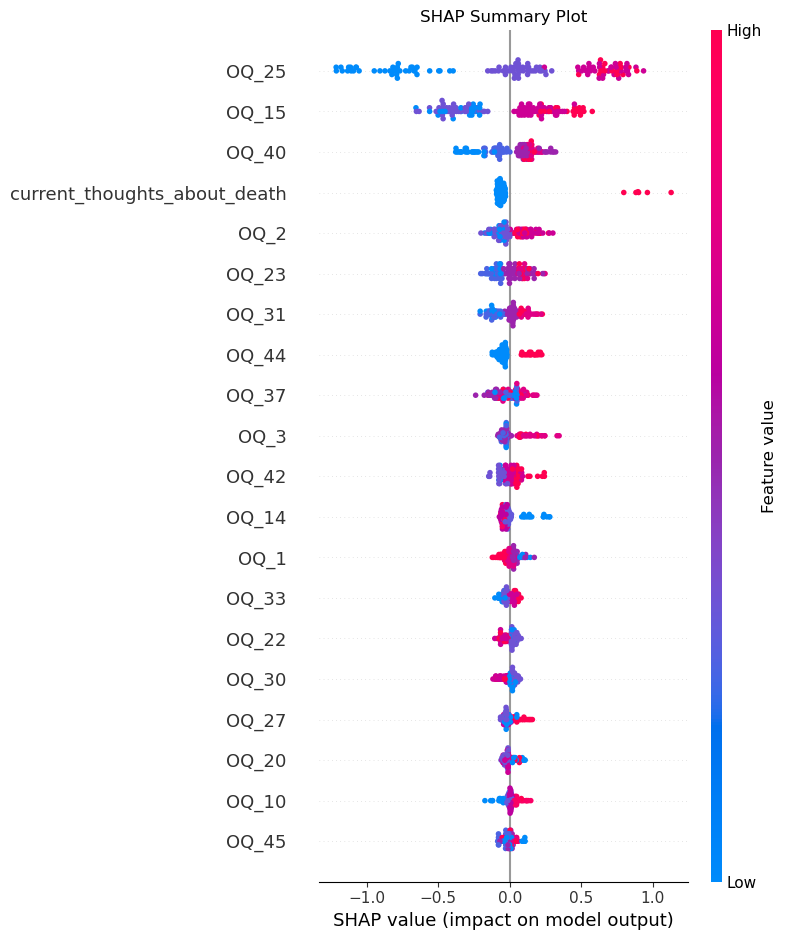

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score, confusion_matrix, recall_score, precision_score, roc_auc_score
from sklearn.model_selection import train_test_split
import numpy as np
import warnings
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import precision_recall_curve
import itertools
from tqdm import tqdm

# Suppress all warnings
warnings.filterwarnings('ignore')

# ========== HYPERPARAMETER TUNING ==========

# Define hyperparameter grid
param_grid = {
    'num_leaves': [20, 31, 50],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200, 300]
}

# Define threshold range to test
thresholds = np.arange(0.05, 1.0, 0.05)

# Generate all parameter combinations
param_combinations = list(itertools.product(
    param_grid['num_leaves'],
    param_grid['learning_rate'],
    param_grid['n_estimators']
))

# Define cross-validation scheme
n_splits = 5
kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Track best
best_f1 = 0
best_params = None
best_threshold = 0.5
results = []

for num_leaves, learning_rate, n_estimators in tqdm(param_combinations):

    # Store fold results
    fold_f1_scores = []
    fold_thresholds = []

    for train_idx, val_idx in kfold.split(X_train, y_train):
        X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        # Train model on the fold
        model = LGBMClassifier(
            num_leaves=num_leaves,
            learning_rate=learning_rate,
            n_estimators=n_estimators,
            objective='binary',
            metric='auc',
            verbose=-1
        )
        model.fit(X_tr, y_tr)

        # Predict probabilities
        val_probs = model.predict_proba(X_val)[:, 1]

        # Test thresholds
        best_fold_f1 = 0
        best_fold_threshold = 0.5

        for threshold in thresholds:
            y_pred_val = (val_probs >= threshold).astype(int)
            f1 = f1_score(y_val, y_pred_val)

            if f1 > best_fold_f1:
                best_fold_f1 = f1
                best_fold_threshold = threshold

        fold_f1_scores.append(best_fold_f1)
        fold_thresholds.append(best_fold_threshold)

    # Average across folds
    mean_f1 = np.mean(fold_f1_scores)
    mean_threshold = np.mean(fold_thresholds)

    results.append({
        'num_leaves': num_leaves,
        'learning_rate': learning_rate,
        'n_estimators': n_estimators,
        'f1_score': mean_f1,
        'best_threshold': mean_threshold
    })

    if mean_f1 > best_f1:
        best_f1 = mean_f1
        best_threshold = mean_threshold
        best_params = {
            'num_leaves': num_leaves,
            'learning_rate': learning_rate,
            'n_estimators': n_estimators
        }

# Convert results to DataFrame for easier analysis
results_df = pd.DataFrame(results)
print("\nTop 5 hyperparameter-threshold combinations by F1 score:")
print(results_df.sort_values('f1_score', ascending=False).head(5))

print("\nBest hyperparameters and threshold:")
print(f"num_leaves: {best_params['num_leaves']}")
print(f"learning_rate: {best_params['learning_rate']}")
print(f"n_estimators: {best_params['n_estimators']}")
print(f"Best threshold: {best_threshold:.2f}")
print(f"Best validation F1 score: {best_f1:.4f}")

# ========== TRAIN FINAL MODEL WITH BEST PARAMETERS ==========

# Set best parameters for final model
final_params = {
    'num_leaves': best_params['num_leaves'],
    'learning_rate': best_params['learning_rate'],
    'n_estimators': best_params['n_estimators'],
    'objective': 'binary',
    'metric': 'auc',
    'verbose': -1
}

# Train final model
final_model = LGBMClassifier(**final_params)
final_model.fit(X_train, y_train)

# ========== EVALUATE ON TEST SET USING BEST THRESHOLD ==========
# Get predictions on test set
test_probs = final_model.predict_proba(X_test)[:, 1]

# Apply the best threshold found during cross-validation
y_pred_test = (test_probs >= best_threshold).astype(int)

# Calculate metrics
test_recall = recall_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test, zero_division=0)
test_f1 = f1_score(y_test, y_pred_test)
test_cm = confusion_matrix(y_test, y_pred_test)

print(f"Test Results with threshold={best_threshold:.2f}:")
print(f"F1 Score: {test_f1:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"Precision: {test_precision:.4f}")

# ========== VISUALIZATION ==========

# Create confusion matrix using the test set
plt.figure(figsize=(8, 6))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No SI', 'SI'],
            yticklabels=['No SI', 'SI'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix on Test Set (Threshold = {best_threshold:.2f})')
plt.show()


# ========== PERFORMANCE SUMMARY ==========
print(f"Best Hyperparameters: num_leaves={best_params['num_leaves']}, "
      f"learning_rate={best_params['learning_rate']}, "
      f"n_estimators={best_params['n_estimators']}")
print(f"Best Threshold: {best_threshold:.2f}")

print("\nTest Set Performance:")
print(f"F1 Score: {test_f1:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"Precision: {test_precision:.4f}")

# Calculate AUC-ROC
auc_roc = roc_auc_score(y_test, test_probs)
print(f"\nAUC-ROC: {auc_roc:.4f}")


# ========== FEATURE IMPORTANCE ==========
# Standard feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': final_model.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
plt.title('Top 15 Most Important Features (Built-in Feature Importance)')
plt.tight_layout()
plt.show()

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

# Calculate SHAP values
explainer = shap.TreeExplainer(final_model)

shap_values = explainer.shap_values(X_test)
    
# Plot feature importance
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.title('SHAP Feature Importance (Test Data)')
plt.tight_layout()
plt.show()

# Create SHAP summary plot
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test, show=False)
plt.title('SHAP Summary Plot')
plt.tight_layout()
plt.show()

#### This next portion I'm going to fit a logistic regression model with and without the text portions of the data and then perform a LRT to see if the text data adds any significant information

In [43]:
# Fitting two logistic regression models, one with all features (OQ + text), and one with only the OQ features

# I use statsmodels here instead of scikit-learn because statsmodels actually gives me the log-likelihood for me to perform an LRT
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Identify OQ features (survey data)
oq_features = [col for col in no_id_clean.columns if col.startswith('OQ_')]

# Identify all predictors (excluding the target variable 'SI')
all_features = [col for col in no_id_clean.columns if col != 'SI']

# Create feature matrices for statsmodels
X_oq = no_id_clean[oq_features]
X_all = no_id_clean[all_features] 

# Model 1: OQ features only
model_oq = sm.Logit(y_binary, sm.add_constant(X_oq))
result_oq = model_oq.fit(disp=0)
print("Model with OQ features only:")
print(result_oq.summary())
ll_oq = result_oq.llf  # Log-likelihood of OQ model

# Model 2: All features (OQ + text)
model_all = sm.Logit(y_binary, sm.add_constant(X_all))
result_all = model_all.fit(method='lbfgs',disp=1, maxiter=1000)
print("\nModel with all features (OQ + text):")
print(result_all.summary())
ll_all = result_all.llf  # Log-likelihood of full model

# Likelihood Ratio Test
# LR = -2 * (ll_restricted - ll_full)
lr_stat = -2 * (ll_oq - ll_all)
# Degrees of freedom = difference in number of parameters
df_diff = len(all_features) - len(oq_features)
# P-value
p_value = stats.chi2.sf(lr_stat, df_diff)

print("\nLikelihood Ratio Test:")
print(f"LR statistic: {lr_stat:.4f}")
print(f"Degrees of freedom: {df_diff}")
print(f"p-value: {p_value:.6f}")

# Optional: Compare prediction performance
y_pred_oq = result_oq.predict(sm.add_constant(X_oq))
y_pred_all = result_all.predict(sm.add_constant(X_all))

print("\nModel with OQ features only - ROC AUC:", roc_auc_score(y_binary, y_pred_oq))
print("Model with all features - ROC AUC:", roc_auc_score(y_binary, y_pred_all))


Model with OQ features only:
                           Logit Regression Results                           
Dep. Variable:                     SI   No. Observations:                  675
Model:                          Logit   Df Residuals:                      630
Method:                           MLE   Df Model:                           44
Date:                Mon, 19 May 2025   Pseudo R-squ.:                  0.2909
Time:                        19:03:48   Log-Likelihood:                -298.44
converged:                       True   LL-Null:                       -420.84
Covariance Type:            nonrobust   LLR p-value:                 1.138e-29
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.2681      0.496     -6.595      0.000      -4.239      -2.297
OQ_1          -0.2695      0.108     -2.503      0.012      -0.481      -0.058
OQ_2           0.1282  

The last model I fit is some form of regularized logistic regression with scikit-learn

100%|██████████| 24/24 [00:12<00:00,  1.88it/s]


Top 5 hyperparameter combinations by average F1 score:
       C penalty     solver  threshold  avg_f1_score
9   0.10      l1       saga       0.30      0.611227
6   0.01      l2  liblinear       0.30      0.611148
7   0.01      l2       saga       0.30      0.610042
8   0.10      l1  liblinear       0.25      0.609032
10  0.10      l2  liblinear       0.25      0.606186

Best hyperparameters and threshold:
C: 0.1
penalty: l1
solver: saga
Threshold: 0.30
Best average CV F1 score: 0.6112
Test Set Performance with Best Threshold (0.30):
F1 Score: 0.5769
Recall: 0.7317
Precision: 0.4762


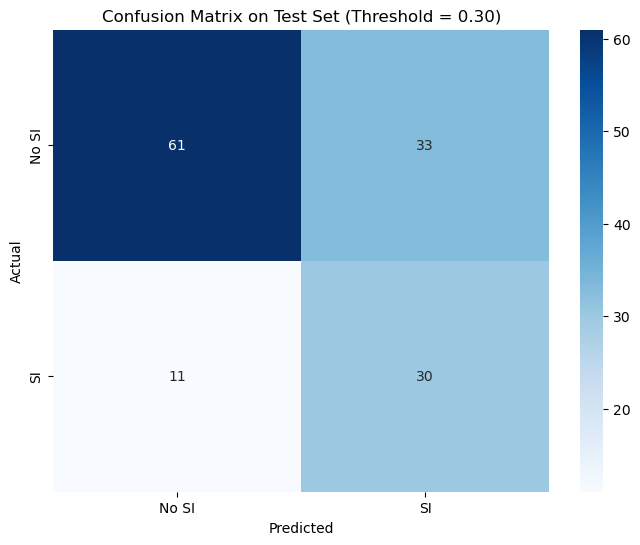

Best Hyperparameters: C=0.1, penalty=l1, solver=saga
Best Threshold (from CV): 0.30

Test Set Performance:
F1 Score: 0.5769
Recall: 0.7317
Precision: 0.4762

AUC-ROC: 0.7898


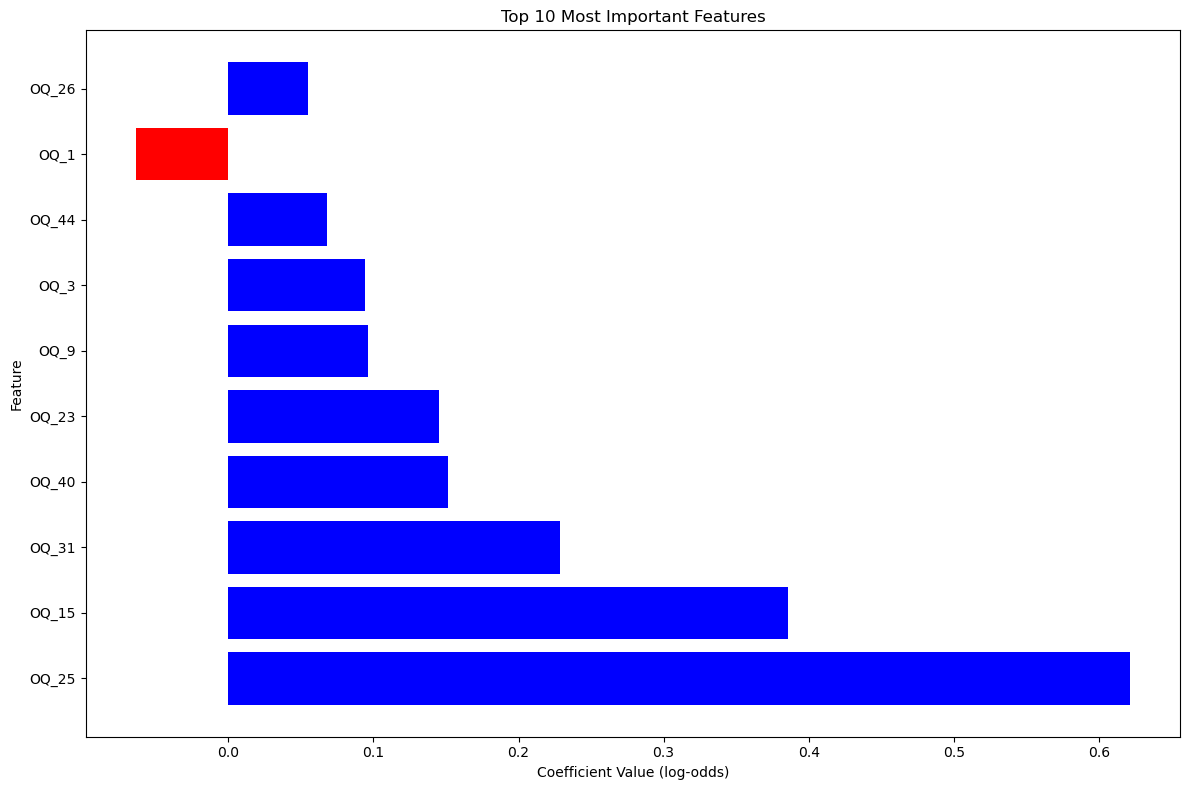


Top 10 Most Important Features:
   Feature  Coefficient
45   OQ_25     0.621568
35   OQ_15     0.385444
51   OQ_31     0.228652
60   OQ_40     0.151635
43   OQ_23     0.145260
29    OQ_9     0.096014
24    OQ_3     0.094126
64   OQ_44     0.068148
22    OQ_1    -0.063949
46   OQ_26     0.054850


In [51]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (f1_score, precision_score, recall_score, confusion_matrix,
                            classification_report, roc_auc_score, precision_recall_curve)
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from tqdm import tqdm
import warnings
from sklearn.preprocessing import StandardScaler
# Suppress warnings
warnings.filterwarnings('ignore')

# Add feature scaling function for OQ_ features

def scale_oq_features(X_train, X_val):
    """
    Scale 'OQ_' features in training and validation sets using StandardScaler.

    Parameters:
    - X_train: Training features DataFrame
    - X_val: Validation features DataFrame

    Returns:
    - Tuple of scaled DataFrames: (X_train_scaled, X_val_scaled)
    """
    # Copy input DataFrames
    X_train_scaled = X_train.copy()
    X_val_scaled = X_val.copy()
    
    # Identify OQ_ features
    oq_features = [col for col in X_train.columns if col.startswith('OQ_')]

    # Fit scaler on training data and transform both
    scaler = StandardScaler()
    X_train_scaled[oq_features] = scaler.fit_transform(X_train[oq_features])
    X_val_scaled[oq_features] = scaler.transform(X_val[oq_features])
    
    return X_train_scaled, X_val_scaled


# ========== HYPERPARAMETER TUNING ==========)

# Define hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']  # These solvers support both l1 and l2
}

# Define threshold range to test
thresholds = np.arange(0.05, 1.0, 0.05)

# Generate all parameter combinations
param_combinations = list(itertools.product(
    param_grid['C'],
    param_grid['penalty'],
    param_grid['solver']
))


# Define KFold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Track best parameters, threshold and score
best_avg_f1 = 0
best_params = None
best_threshold = 0.5
results = []

# Test each combination
for C, penalty, solver in tqdm(param_combinations):
    

    # Initialize model with current hyperparameters
    model = LogisticRegression(
        C=C,
        penalty=penalty,
        solver=solver,
        max_iter=1000,
        random_state=42
    )
    
    # Track threshold performance across folds
    threshold_f1_scores = {t: [] for t in thresholds}
    
    # Perform k-fold cross-validation
    for train_idx, val_idx in kf.split(X_train):
        # Split data for this fold
        X_fold_train, X_fold_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
        
        # Scale OQ features if needed
        X_fold_train, X_fold_val = scale_oq_features(X_fold_train, X_fold_val)
        
        # Fit model
        model.fit(X_fold_train, y_fold_train)
        
        # Get probabilities for validation set
        y_fold_probs = model.predict_proba(X_fold_val)[:, 1]
        
        # Try different thresholds
        for threshold in thresholds:
            # Apply threshold
            y_fold_pred = (y_fold_probs >= threshold).astype(int)
            
            # Calculate F1 score
            fold_f1 = f1_score(y_fold_val, y_fold_pred)
            
            # Store this threshold's performance for this fold
            threshold_f1_scores[threshold].append(fold_f1)
    
    # Calculate average F1 score for each threshold across all folds
    avg_f1_by_threshold = {t: np.mean(scores) for t, scores in threshold_f1_scores.items()}
    
    # Find best threshold for this model
    best_model_threshold = max(avg_f1_by_threshold, key=avg_f1_by_threshold.get)
    best_model_f1 = avg_f1_by_threshold[best_model_threshold]
    
    # Store result
    results.append({
        'C': C,
        'penalty': penalty,
        'solver': solver,
        'threshold': best_model_threshold,
        'avg_f1_score': best_model_f1
    })
    
    # Update best parameters if better F1 score found
    if best_model_f1 > best_avg_f1:
        best_avg_f1 = best_model_f1
        best_params = {
            'C': C,
            'penalty': penalty,
            'solver': solver
        }
        best_threshold = best_model_threshold

# Convert results to DataFrame for easier analysis
results_df = pd.DataFrame(results)
print("\nTop 5 hyperparameter combinations by average F1 score:")
print(results_df.sort_values('avg_f1_score', ascending=False).head(5))

print("\nBest hyperparameters and threshold:")
print(f"C: {best_params['C']}")
print(f"penalty: {best_params['penalty']}")
print(f"solver: {best_params['solver']}")
print(f"Threshold: {best_threshold:.2f}")
print(f"Best average CV F1 score: {best_avg_f1:.4f}")

# ========== TRAIN FINAL MODEL WITH BEST PARAMETERS ==========

# Train final model on all training data with best parameters
final_model = LogisticRegression(
    C=best_params['C'],
    penalty=best_params['penalty'],
    solver=best_params['solver'],
    max_iter=1000,
    random_state=42
)
final_model.fit(X_train, y_train)

# ========== EVALUATE ON TEST SET ==========
# Get probability predictions on test set
test_probs = final_model.predict_proba(X_test)[:, 1]

# Apply the best threshold determined during cross-validation
y_pred_best = (test_probs >= best_threshold).astype(int)

# Calculate metrics
test_recall = recall_score(y_test, y_pred_best)
test_precision = precision_score(y_test, y_pred_best, zero_division=0)
test_f1 = f1_score(y_test, y_pred_best)
test_cm = confusion_matrix(y_test, y_pred_best)

# Display results with best threshold
print(f"Test Set Performance with Best Threshold ({best_threshold:.2f}):")
print(f"F1 Score: {test_f1:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"Precision: {test_precision:.4f}")

# ========== VISUALIZATION ==========

# Create confusion matrix for test set with best threshold
plt.figure(figsize=(8, 6))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No SI', 'SI'],
            yticklabels=['No SI', 'SI'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix on Test Set (Threshold = {best_threshold:.2f})')
plt.show()


# ========== PERFORMANCE SUMMARY ==========
print(f"Best Hyperparameters: C={best_params['C']}, "
      f"penalty={best_params['penalty']}, "
      f"solver={best_params['solver']}")
print(f"Best Threshold (from CV): {best_threshold:.2f}")

print("\nTest Set Performance:")
print(f"F1 Score: {test_f1:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"Precision: {test_precision:.4f}")

# Calculate AUC-ROC
auc_roc = roc_auc_score(y_test, test_probs)
print(f"\nAUC-ROC: {auc_roc:.4f}")

# ========== FEATURE IMPORTANCE ==========
# Get feature importance (coefficients)
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': final_model.coef_[0],
    'Abs_Coefficient': np.abs(final_model.coef_[0])
})
coef_df = coef_df.sort_values('Abs_Coefficient', ascending=False)

# Plot top 15 features
plt.figure(figsize=(12, 8))
top_features = coef_df.head(10)
colors = ['red' if c < 0 else 'blue' for c in top_features['Coefficient']]
plt.barh(top_features['Feature'], top_features['Coefficient'], color=colors)
plt.xlabel('Coefficient Value (log-odds)')
plt.ylabel('Feature')
plt.title('Top 10 Most Important Features')
plt.tight_layout()
plt.show()

print("\nTop 10 Most Important Features:")
print(coef_df[['Feature', 'Coefficient']].head(10))

Finally this is the model that I chose in the end, this is a logistic regression model without any regularization. I chose this model because it is easy to interpret, performs as well or better than the others, and I could perform a statistical test on it to assess whether adding the text data helped with the model's performance


Best threshold from cross-validation: 0.15
Average CV F1 score at best threshold: 0.6004
Test Set Performance with Best Threshold (0.15):
F1 Score: 0.6316
Recall: 0.8780
Precision: 0.4932


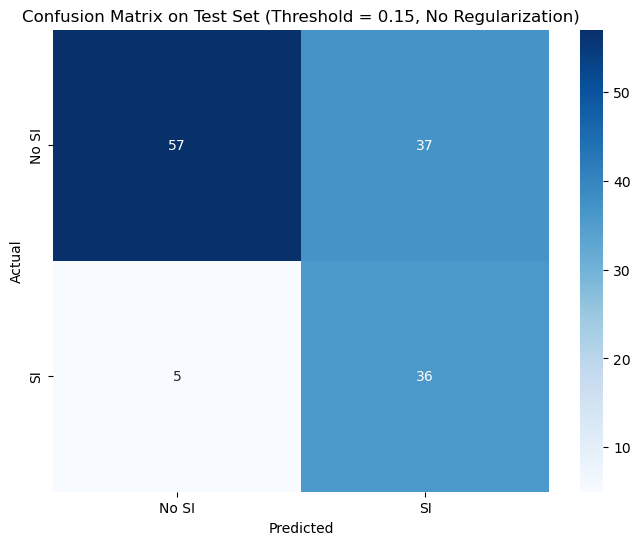

Logistic Regression
Best Threshold (from CV): 0.15

Test Set Performance:
F1 Score: 0.6316
Recall: 0.8780
Precision: 0.4932

AUC-ROC: 0.8233


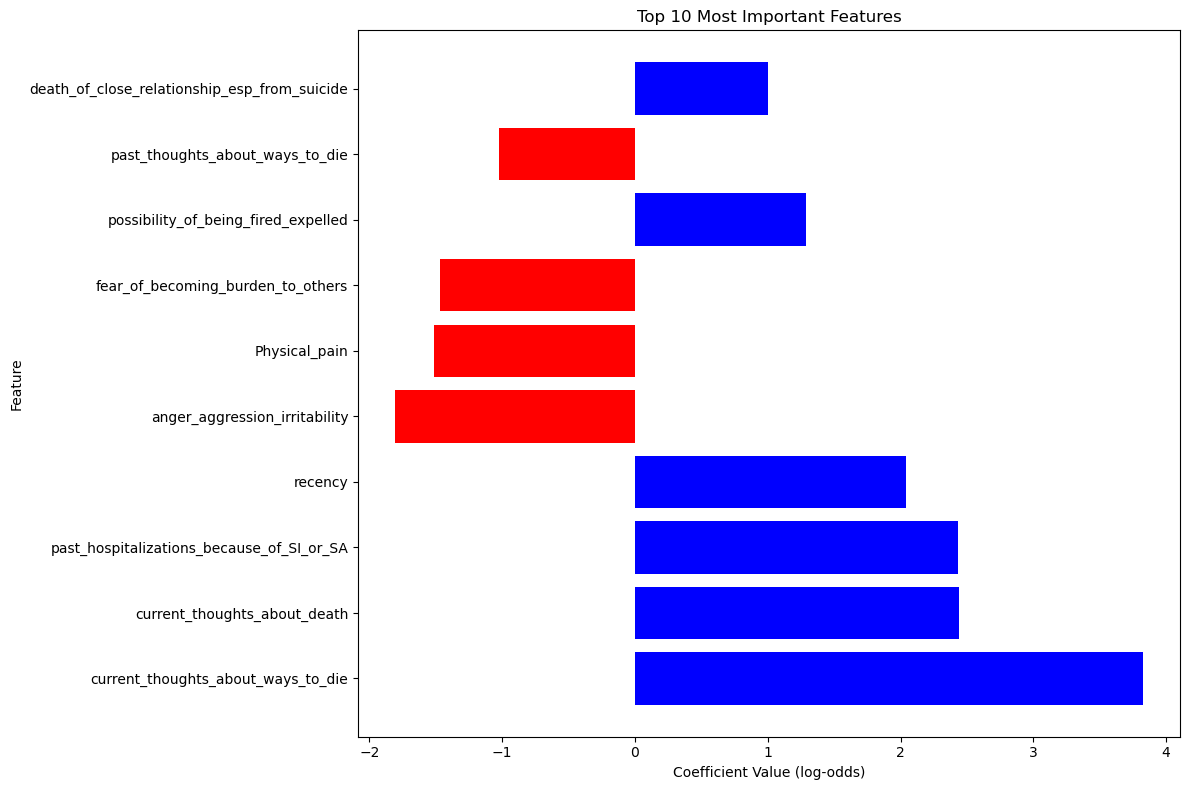


Top 10 Most Important Features:
                                         Feature  Coefficient
5             current_thoughts_about_ways_to_die     3.823363
4                   current_thoughts_about_death     2.442664
3      past_hospitalizations_because_of_SI_or_SA     2.431619
21                                       recency     2.038526
10                 anger_aggression_irritability    -1.804264
20                                 Physical_pain    -1.516060
16             fear_of_becoming_burden_to_others    -1.470834
11           possibility_of_being_fired_expelled     1.287346
1                past_thoughts_about_ways_to_die    -1.020580
13  death_of_close_relationship_esp_from_suicide     0.998514


In [52]:
# Logistic regression without any regularization

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (f1_score, precision_score, recall_score, confusion_matrix,
                            classification_report, roc_auc_score, precision_recall_curve)
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
from sklearn.preprocessing import StandardScaler
# Suppress warnings
warnings.filterwarnings('ignore')

# ========== LOGISTIC REGRESSION WITHOUT REGULARIZATION ==========

# Define threshold range to test
thresholds = np.arange(0.05, 1.0, 0.05)

# Define KFold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize model with no regularization
# We'll use 'lbfgs' solver which works with penalty='none'
model = LogisticRegression(
    penalty=None,  # No regularization
    solver='lbfgs',  # Compatible solver for no penalty
    max_iter=1000,
    random_state=42
)

# Track threshold performance across folds
threshold_f1_scores = {t: [] for t in thresholds}

# Perform k-fold cross-validation to find best threshold
for train_idx, val_idx in kf.split(X_train):
    # Split data for this fold
    X_fold_train, X_fold_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_fold_train, y_fold_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
    
    # Scale OQ features if needed
    X_fold_train, X_fold_val = scale_oq_features(X_fold_train, X_fold_val)
    
    # Fit model
    model.fit(X_fold_train, y_fold_train)
    
    # Get probabilities for validation set
    y_fold_probs = model.predict_proba(X_fold_val)[:, 1]
    
    # Try different thresholds
    for threshold in thresholds:
        # Apply threshold
        y_fold_pred = (y_fold_probs >= threshold).astype(int)
        
        # Calculate F1 score
        fold_f1 = f1_score(y_fold_val, y_fold_pred)
        
        # Store this threshold's performance for this fold
        threshold_f1_scores[threshold].append(fold_f1)

# Calculate average F1 score for each threshold across all folds
avg_f1_by_threshold = {t: np.mean(scores) for t, scores in threshold_f1_scores.items()}

# Find best threshold
best_threshold = max(avg_f1_by_threshold, key=avg_f1_by_threshold.get)
best_avg_f1 = avg_f1_by_threshold[best_threshold]

# Show best threshold from CV
print(f"\nBest threshold from cross-validation: {best_threshold:.2f}")
print(f"Average CV F1 score at best threshold: {best_avg_f1:.4f}")

# ========== TRAIN FINAL MODEL ==========

# Train final model on all training data
final_model = LogisticRegression(
    penalty=None,
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)
final_model.fit(X_train, y_train)

# ========== EVALUATE ON TEST SET ==========
# Get probability predictions on test set
test_probs = final_model.predict_proba(X_test)[:, 1]

# Apply the best threshold determined during cross-validation
y_pred_best = (test_probs >= best_threshold).astype(int)

# Calculate metrics
test_recall = recall_score(y_test, y_pred_best)
test_precision = precision_score(y_test, y_pred_best, zero_division=0)
test_f1 = f1_score(y_test, y_pred_best)
test_cm = confusion_matrix(y_test, y_pred_best)

# Display results with best threshold
print(f"Test Set Performance with Best Threshold ({best_threshold:.2f}):")
print(f"F1 Score: {test_f1:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"Precision: {test_precision:.4f}")

# ========== VISUALIZATION ==========

# Create confusion matrix for test set with best threshold
plt.figure(figsize=(8, 6))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No SI', 'SI'],
            yticklabels=['No SI', 'SI'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix on Test Set (Threshold = {best_threshold:.2f}, No Regularization)')
plt.show()

# ========== PERFORMANCE SUMMARY ==========
print(f"Logistic Regression")
print(f"Best Threshold (from CV): {best_threshold:.2f}")

print("\nTest Set Performance:")
print(f"F1 Score: {test_f1:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"Precision: {test_precision:.4f}")

# Calculate AUC-ROC
auc_roc = roc_auc_score(y_test, test_probs)
print(f"\nAUC-ROC: {auc_roc:.4f}")


# ========== FEATURE IMPORTANCE ==========
# Get feature importance (coefficients)
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': final_model.coef_[0],
    'Abs_Coefficient': np.abs(final_model.coef_[0])
})
coef_df = coef_df.sort_values('Abs_Coefficient', ascending=False)

# Plot top 10 features
plt.figure(figsize=(12, 8))
top_features = coef_df.head(10)
colors = ['red' if c < 0 else 'blue' for c in top_features['Coefficient']]
plt.barh(top_features['Feature'], top_features['Coefficient'], color=colors)
plt.xlabel('Coefficient Value (log-odds)')
plt.ylabel('Feature')
plt.title('Top 10 Most Important Features')
plt.tight_layout()
plt.show()

print("\nTop 10 Most Important Features:")
print(coef_df[['Feature', 'Coefficient']].head(10))


### The last thing we are going to do is compare the presence of SI as suggested by the OQ questionarre and by the model

In [53]:
# identify which rows indicate SI according to the model. This is rows where current ideation is taking place

condition_with_1 = (no_id["current_thoughts_about_death"] == 1) | (no_id["current_thoughts_about_ways_to_die"] == 1) | (no_id["current_intent_to_try_to_die"] == 1)
condition_with_0 = ~condition_with_1

mod_si = no_id.loc[condition_with_1, 'SI']
mod_no_si = no_id.loc[condition_with_0, 'SI']

# Get the rows where the OQ indicates SI
oq_si = df.loc[df['SI'] > 0, 'SI']
oq_no_si = df.loc[df['SI'] == 0, 'SI']

# performing McNemar's test

from statsmodels.stats.contingency_tables import mcnemar

# Create a contingency table
contingency = pd.crosstab(no_id['SI'] > 0, condition_with_1)

print(contingency)

# perform McNemar's test
result = mcnemar(contingency, exact=False)

print(f'Statistic: {result.statistic}')
print(f'p-value: {result.pvalue}')


col_0  False  True 
SI                 
False    463      3
True     185     32
Statistic: 174.26063829787233
p-value: 8.682927356262945e-40
